In [95]:
import cv2  
import numpy as np 
import matplotlib.pyplot as plt 


In [100]:
labelsPath = "/home/harshita/coco.names"
labels = open(labelsPath).read().strip().split("\n")
weightsPath = "/home/harshita/yolov3.weights"
configPath = "/home/harshita/yolov3.cfg"


YOLO = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = YOLO.getLayerNames()
ln = [ln[i[0] - 1] for i in YOLO.getUnconnectedOutLayers()]

In [113]:
ctr = 0

VOC = []
for i in labels:
    if(i == 'bottle'):
        VOC.append(20);
    elif(i == 'chair'): 
        VOC.append(40);
    elif(i == 'sofa'): 
        VOC.append(50);
    elif(i == 'diningtable'): 
        VOC.append(60);
    elif(i == 'bed'): 
        VOC.append(75;
    else:
        VOC.append(0);
    
    

In [114]:
print(VOC)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (20, 40), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (50, 60), (60, 70), (0, 0), (70, 80), (40, 70), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0)]


In [119]:
path = '/home/harshita/f2.jpeg'
image = cv2.imread(path)

blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB = True, crop = False)
YOLO.setInput(blob)
layerOutputs = YOLO.forward(ln)
(h, w) = image.shape[:2]
boxes=[]
confidences=[]
classIDs=[]
for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            if confidence > 0.6 and labels[classID]!= 'person':
                #num += 1
                box = detection[0:4]*np.array([w,h,w,h])
                (cX, cY, width, height) = box.astype("int")
                x = int(cX - (width/2))
                y = int(cY - (height/2))
                boxes.append([x,y,int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

                

In [120]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
if len(idxs) > 0:
    for i in idxs.flatten():
        if confidences[i] > 0.4 :
                (x,y) = (boxes[i][0], boxes[i][1])
                (w,h) = (boxes[i][2], boxes[i][3])
                cv2.rectangle(image, (x,y), (x+w, y+h), (255,0,0), 2)
                text = "{}: {:.4f}".format(labels[classIDs[i]], confidences[i])
                cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
                

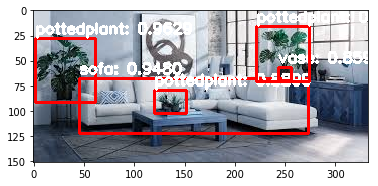

In [121]:
plt.imshow(image)

In [115]:
confidences 

[]

In [84]:
boxes 

[[154, 161, 174, 201],
 [8, 360, 170, 245],
 [73, 333, 404, 273],
 [391, 391, 216, 279],
 [186, 278, 95, 83],
 [-1, 359, 146, 243],
 [114, 332, 96, 30]]

In [85]:
print(classIDs)

[58, 56, 60, 56, 75, 56, 45]


In [86]:
for i in classIDs:
    print(labels[i])

pottedplant
chair
diningtable
chair
vase
chair
bowl


In [68]:
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
